# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Wholesale_Data.csv')
df


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [24]:
df_new = df.drop(columns=['Channel', 'Region'])
df_new

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [18]:
# Grouping by Channel and Region 
correlation_by_channel_region = df.groupby(['Channel', 'Region']).corr()

correlation_by_channel_region


Fresh      Milk   Grocery    Frozen  \
Channel Region                                                            
1       1      Fresh             1.000000 -0.030104  0.045798  0.284044   
               Milk             -0.030104  1.000000  0.654953  0.209049   
               Grocery           0.045798  0.654953  1.000000  0.074441   
               Frozen            0.284044  0.209049  0.074441  1.000000   
               Detergents_Paper -0.240961  0.264108  0.430465 -0.123323   
               Delicassen        0.371046  0.526746  0.408734  0.407924   
        2      Fresh             1.000000  0.538010  0.371276  0.370910   
               Milk              0.538010  1.000000  0.538396  0.868415   
               Grocery           0.371276  0.538396  1.000000  0.578441   
               Frozen            0.370910  0.868415  0.578441  1.000000   
               Detergents_Paper  0.292049  0.310327  0.643869  0.280257   
               Delicassen        0.448836  0.862334  0.485122  0.801835   
        3      Fresh             1.000000  0.291219  0.275877  0.402522   
               Milk              0.291219  1.000000  0.602661  0.446422   
               Grocery           0.275877  0.602661  1.000000  0.245255   
               Frozen            0.402522  0.446422  0.245255  1.000000   
               Detergents_Paper  0.044435  0.236519  0.601581 -0.035816   
               Delicassen        0.248602  0.669801  0.484783  0.502096   
2       1      Fresh             1.000000  0.129173 -0.004491  0.280973   
               Milk              0.129173  1.000000  0.920545  0.225153   
               Grocery          -0.004491  0.920545  1.000000  0.010257   
               Frozen            0.280973  0.225153  0.010257  1.000000   
               Detergents_Paper  0.006686  0.924931  0.877570  0.068556   
               Delicassen       -0.047312  0.270092  0.211700  0.262825   
        2      Fresh             1.000000 -0.205999 -0.095924  0.364857   
               Milk             -0.205999  1.000000  0.083706 -0.222350   
               Grocery          -0.095924  0.083706  1.000000 -0.272010   
               Frozen            0.364857 -0.222350 -0.272010  1.000000   
               Detergents_Paper -0.153187  0.009199  0.949120 -0.287305   
               Delicassen        0.395425  0.063477 -0.052828  0.488871   
        3      Fresh             1.000000  0.276170  0.140074  0.341431   
               Milk              0.276170  1.000000  0.725886  0.263017   
               Grocery           0.140074  0.725886  1.000000  0.137162   
               Frozen            0.341431  0.263017  0.137162  1.000000   
               Detergents_Paper  0.078142  0.724766  0.929200  0.104495   
               Delicassen        0.296074  0.360933  0.179665  0.347027   

                                 Detergents_Paper  Delicassen  
Channel Region                                                 
1       1      Fresh                    -0.240961    0.371046  
               Milk                      0.264108    0.526746  
               Grocery                   0.430465    0.408734  
               Frozen                   -0.123323    0.407924  
               Detergents_Paper          1.000000    0.019878  
               Delicassen                0.019878    1.000000  
        2      Fresh                     0.292049    0.448836  
               Milk                      0.310327    0.862334  
               Grocery                   0.643869    0.485122  
               Frozen                    0.280257    0.801835  
               Detergents_Paper          1.000000    0.256572  
               Delicassen                0.256572    1.000000  
        3      Fresh                     0.044435    0.248602  
               Milk                      0.236519    0.669801  
               Grocery                   0.601581    0.484783  
               Frozen                   -0.035816    0.502096  
               Detergents_Paper  

In [5]:
# Check for missing values 
missing_values = df.isnull().sum()
print(missing_values)

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [9]:
df_without_channel_region = df.drop(columns=['Channel', 'Region'])
descriptive_stats = df_without_channel_region.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T
descriptive_stats

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Fresh,440.0,12000.297727,12647.328865,3.0,915.6,3127.75,8504.0,16933.75,27090.5,36818.50,56082.61,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,889.8,1533.00,3627.0,7190.25,12229.9,16843.40,37610.06,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,1381.9,2153.00,4755.5,10655.75,18910.1,24033.50,43435.74,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,281.3,742.25,1526.0,3554.25,7545.3,9930.75,17964.82,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,99.6,256.75,816.5,3922.00,7438.3,12043.20,22571.61,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,180.8,408.25,965.5,1820.25,2945.9,4485.40,8274.66,47943.0


In [14]:
# Correlation matrix to get an overview of feature relationships
df_without_channel_region = df.drop(columns=['Channel', 'Region'])
correlation_matrix = df_without_channel_region.corr()
correlation_matrix


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


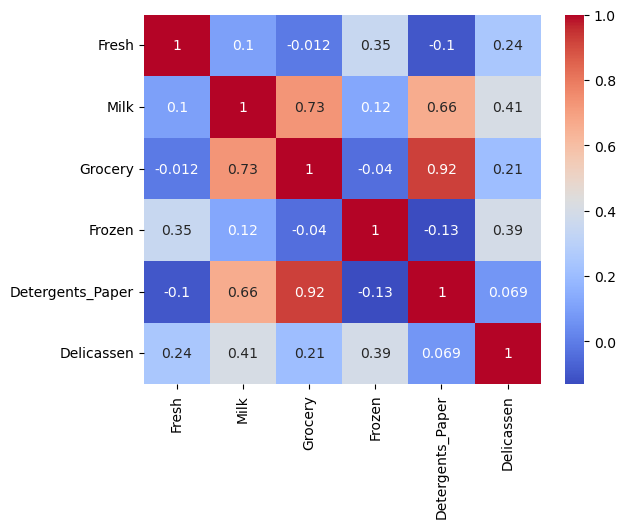

In [15]:
#Creating a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

In [16]:
# cchecking for any outliers in the predictor variables?
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Channel no
Region no
Fresh yes
Milk yes
Grocery yes
Frozen yes
Detergents_Paper yes
Delicassen yes


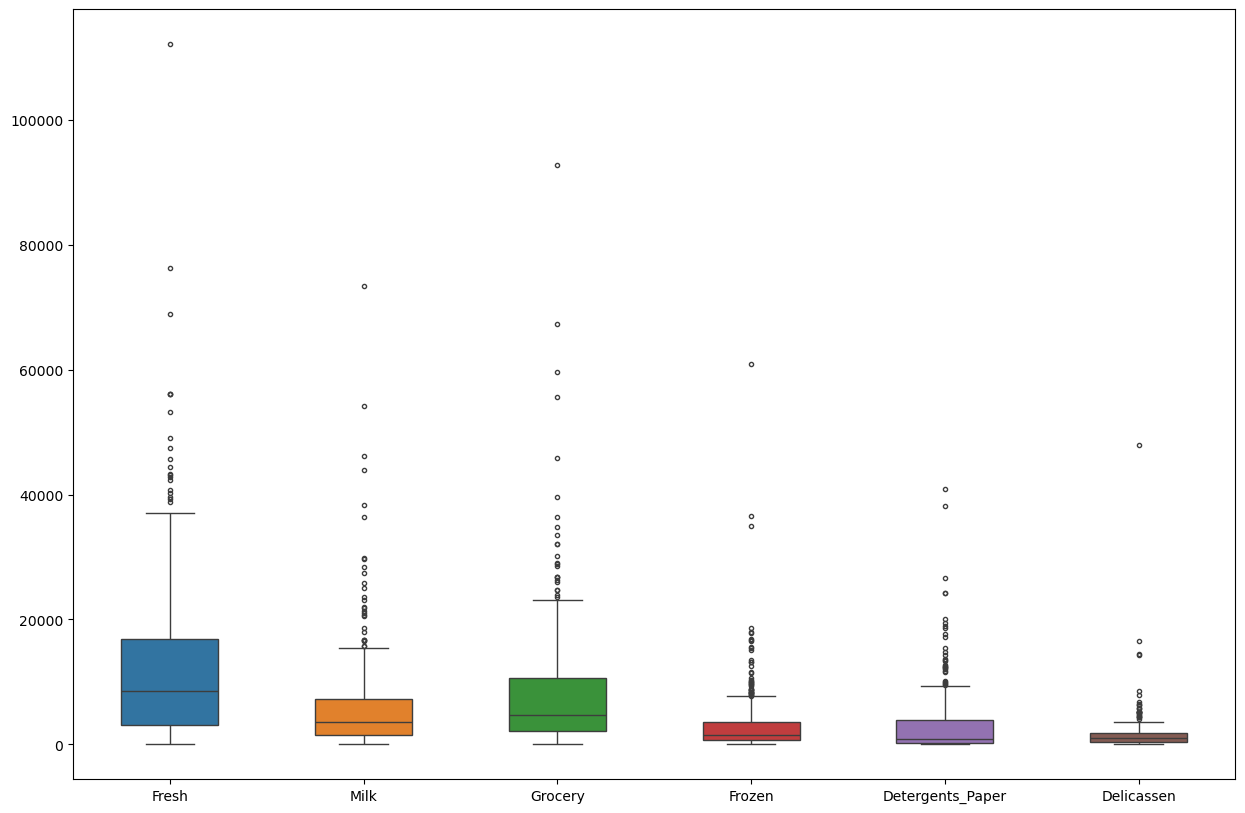

In [26]:
#Handling outliers
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = df_new, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [30]:
Q1 = df_new['Fresh'].quantile(0.25)
Q3 = df_new['Fresh'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Cast 'upper' to the same data type as the 'Fresh' column
upper = df_new['Fresh'].dtype.type(upper)

df_new.loc[df_new['Fresh'] > upper, 'Fresh'] = upper




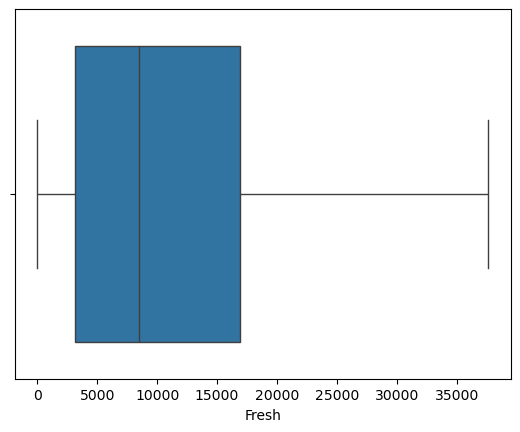

In [31]:
sns.boxplot(x = df_new["Fresh"]);

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

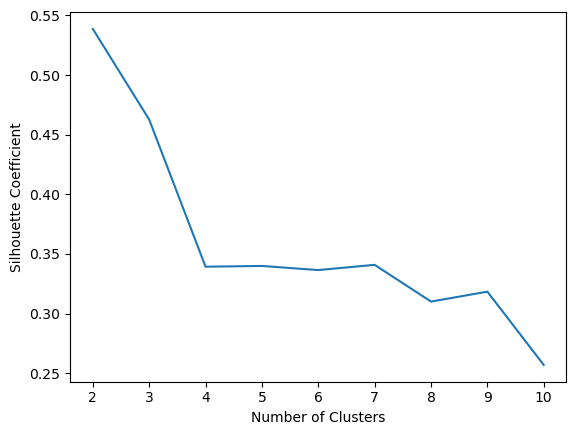

The optimal number of clusters is: 2


In [33]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

#scaling the data attributes
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_new)

# Determining the optimal number of clusters using silhouette score
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plotting silhouette scores to find the optimal number of clusters
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

# Selecting the optimal number of clusters 
optimal_clusters = silhouette_coefficients.index(max(silhouette_coefficients)) + 2
print(f"The optimal number of clusters is: {optimal_clusters}")

# Performing k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans.fit(scaled_features)

df_new['Cluster'] = kmeans.labels_



# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

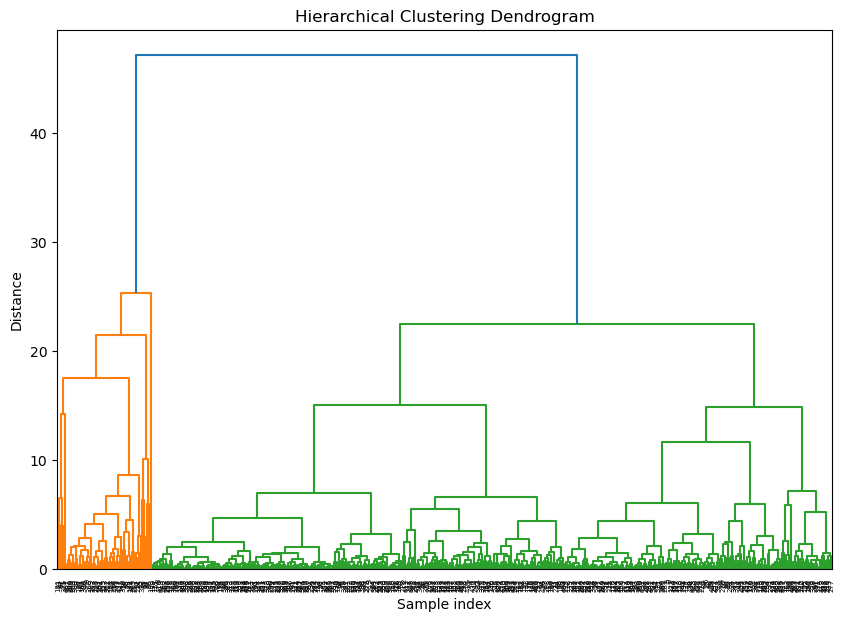

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_new)

# hierarchical clustering
linked = linkage(scaled_features, method='ward')

# Plotting dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df_new.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

# The optimal number of clusters was determined by identifying the largest vertical distance on the dendrogram
# without crossing too many horizontal lines. This signified a somewhat balanced segmentation of the data into distinct groups. 




# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

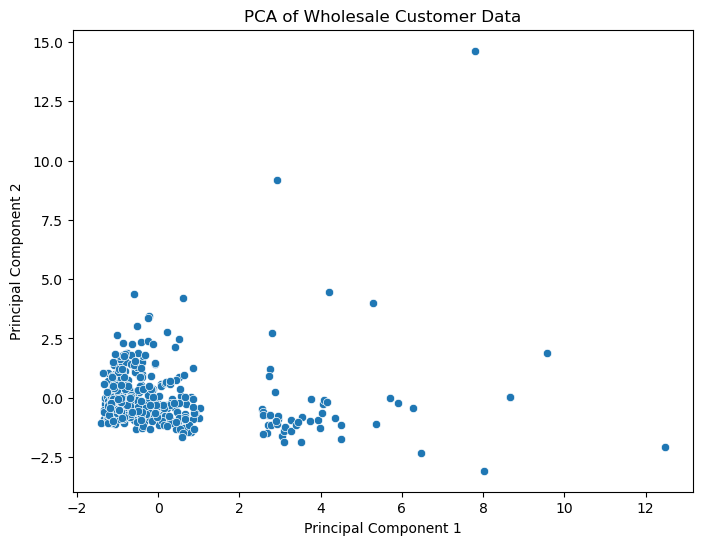

Explained variance by each component:  [0.4734402  0.24250029]


In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Scaled features
scaler = StandardScaler()
scaled_df_new = scaler.fit_transform(df_new)

# Applying PCA
pca = PCA(n_components=2)  # Adjust n_components as needed
principal_components = pca.fit_transform(scaled_df_new)

# Converted to a DataFrame for easier plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA of Wholesale Customer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# variance explained
print("Explained variance by each component: ", pca.explained_variance_ratio_)


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

### Skewness in Spending:

The data shows a rightward skew, meaning that while most customers spend a relatively modest amount on various products, there's a small group that spends much more than average. This pattern is evident across several product categories.

### Relationships Between Product Categories:

A close relationship exists between spending on certain products. Specifically:
Customers who spend more on groceries are also likely to spend more on detergents and paper products, as indicated by a very high correlation of 0.92.
There is also a notable link between milk and grocery spending, with a strong correlation of 0.73.
Milk purchases show a moderate correlation with detergents and paper products (0.66) and a positive correlation with delicatessen items (0.41), although less pronounced.


### Distinct Spending Patterns:

The "Fresh" category is unique; it does not correlate strongly with other categories, indicating that customers have specific preferences or needs regarding fresh products.
In terms of median spending, customers spend the most on "Fresh," followed by "Grocery" and "Milk," whereas "Delicatessen" sees the least average spending.

### Consistency in Spending:

The "Frozen" and "Detergents_Paper" categories show similar median spending amounts, but the "Frozen" category has a tighter spending range, suggesting customers' spending on these items is more consistent.

### General Purchasing Behaviors:

The spending distribution in categories like "Fresh," "Grocery," and "Milk" is right-skewed. This means most customers fall into the lower spending range, but there are a few who spend significantly more.
On the other hand, spending in categories like "Delicatessen" and "Detergents_Paper" tends to be moderate across the board, indicating a more uniform spending behavior with fewer high-spending outliers.
